# 상관분석 연속형 - 연속형 데이터

In [2]:
import pandas as pd

In [3]:
bank = pd.read_csv("bank.csv", sep = ";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


- 데이터 탐색

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

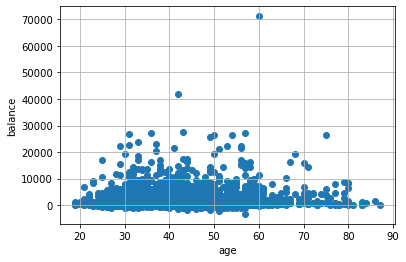

In [5]:
plt.scatter(bank.age, bank.balance)
plt.xlabel("age")
plt.ylabel("balance")
plt.grid() # 격자 무늬

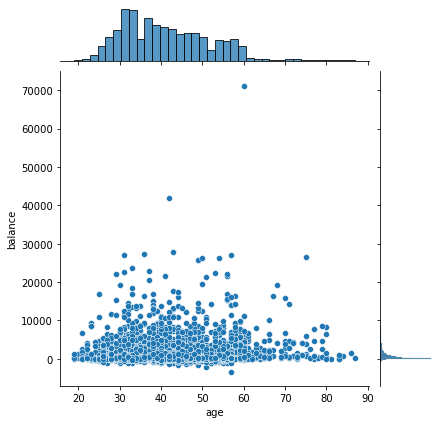

In [6]:
sns.jointplot( x = bank.age, y = bank.balance)

- 상관분석 연속형 - 연속형 데이터

In [7]:
import scipy.stats as stats

In [14]:
corr = stats.pearsonr(bank.age, bank.balance)
corr=
# 왼쪽값이 상관계수값, 오른쪽 값이 p-value 값

(0.08382014224477764, 1.658480874647685e-08)

## 상관계수

- 피어슨 상관계수
- 상관 분석 - 위키백과, 우리 모두의 백과사전
- r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다.
- 결정계수(coefficient of determination) 는 r ** 2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.
- r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
- r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
- r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
- r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
- r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
- r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
- r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계


In [15]:
bank_ctn = bank[["age", "balance", "duration", "campaign", "pdays", "previous"]]
bank_ctn.head()

,age,balance,duration,campaign,pdays,previous
0,30,1787,79,1,-1,0
1,33,4789,220,1,339,4
2,35,1350,185,1,330,1
3,30,1476,199,4,-1,0
4,59,0,226,1,-1,0


In [10]:
bank_ctn.corr(method = "pearson") #상관계수값 구하기

,age,balance,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.015950,-0.009976,0.009437,0.026196
duration,-0.002367,-0.015950,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,0.018080,-0.067833,0.577562,1.000000


- 시각화

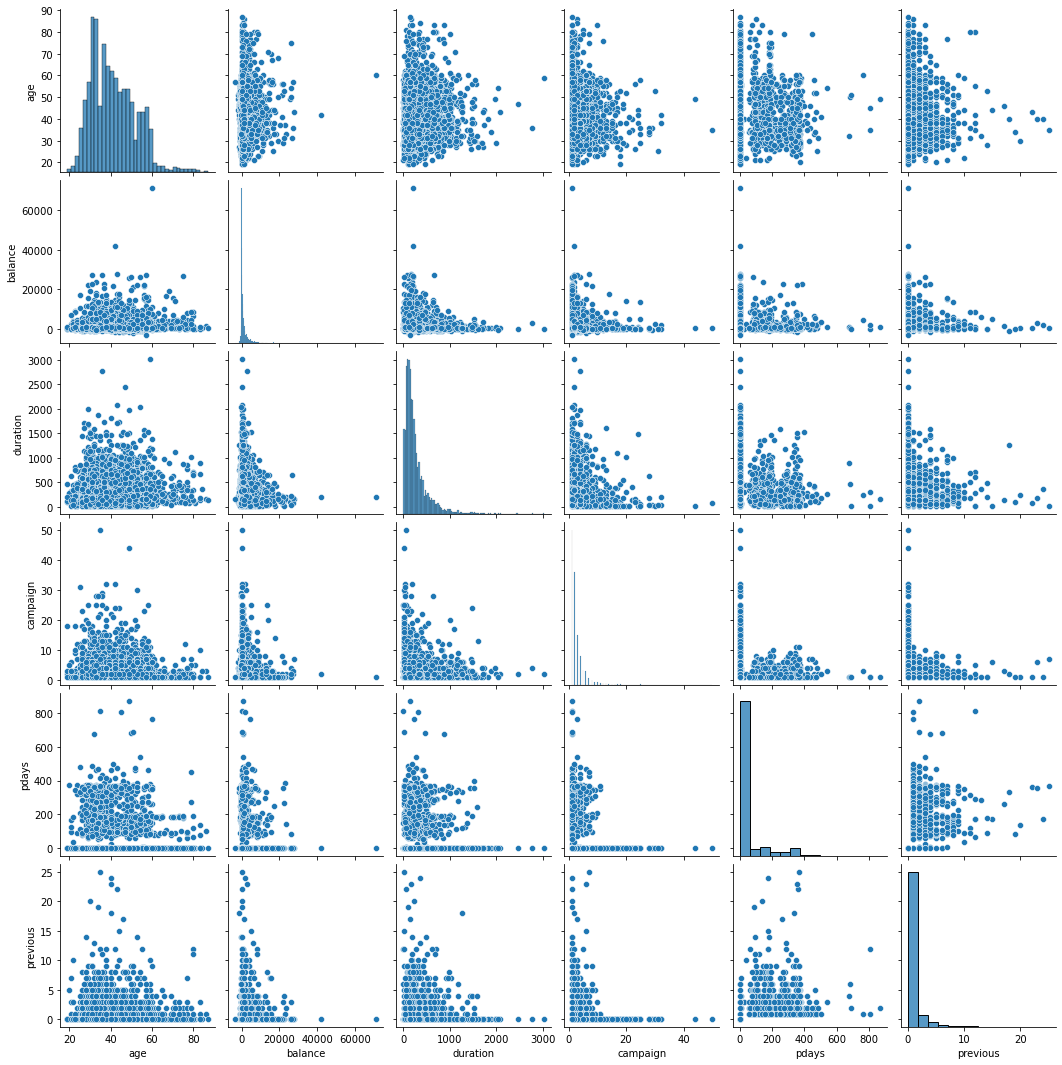

In [11]:
sns.pairplot(bank_ctn)
plt.show()

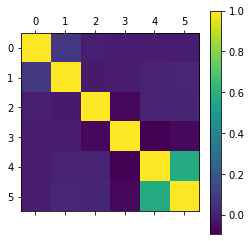

In [12]:
plt.matshow(bank_ctn.corr(method = "pearson"))
plt.colorbar()

<AxesSubplot:>

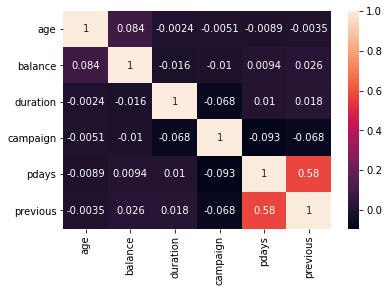

In [13]:
sns.heatmap(bank_ctn.corr(method = "pearson"), annot = True) 
# annot = True 는 상관계수값도 포함하겠다